# 학습 관련 기술들

# 매개변수 갱신
최적화: 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것  
확률적 경사 하강법 (SGD)는 단순하고 좋은 방법이지만 단점도 존재

## SGD
기울어진 방향으로 학습률을 곱한 만큼 이동하는 방법

In [10]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

optimizer가 매개변수 갱신을 담당  
매개변수와 기울기 정보만 전달하면 됨

## SGD 단점

$$f(x,y)=\frac{1}{20}x^2+y^2$$
비등방성 함수에 대한 업데이트가 비효율적으로 이루어짐

이러한 단점을 개선한 Momentum, AdaGrad, Adam 등 존재

In [2]:
def anisotropy_function(x, y):
    return (1 / 20) * (x ** 2) + (y ** 2)


def compute_gradients(x, y):
    df_dx = (1 / 10) * x
    df_dy = 2 * y
    return {'x': df_dx, 'y': df_dy}

In [3]:
params = {'x': -7.0, 'y': 2.0}


def solve():
    optimizer = SGD(lr=0.95)
    epochs = 100
    
    for epoch in range(epochs):
        grads = compute_gradients(params['x'], params['y'])
        optimizer.update(params, grads)

        print(f'Iteration {epoch} | Optimized Parameters: x = {params["x"]}, y = {params["y"]}')

In [4]:
solve()

Iteration 0 | Optimized Parameters: x = -6.335, y = -1.7999999999999998
Iteration 1 | Optimized Parameters: x = -5.733175, y = 1.6199999999999997
Iteration 2 | Optimized Parameters: x = -5.188523375, y = -1.4579999999999997
Iteration 3 | Optimized Parameters: x = -4.695613654375, y = 1.3121999999999998
Iteration 4 | Optimized Parameters: x = -4.249530357209375, y = -1.18098
Iteration 5 | Optimized Parameters: x = -3.8458249732744845, y = 1.0628819999999997
Iteration 6 | Optimized Parameters: x = -3.4804716008134085, y = -0.9565937999999994
Iteration 7 | Optimized Parameters: x = -3.1498267987361346, y = 0.8609344199999993
Iteration 8 | Optimized Parameters: x = -2.8505932528562017, y = -0.7748409779999994
Iteration 9 | Optimized Parameters: x = -2.5797868938348625, y = 0.6973568801999994
Iteration 10 | Optimized Parameters: x = -2.3347071389205505, y = -0.6276211921799995
Iteration 11 | Optimized Parameters: x = -2.112909960723098, y = 0.5648590729619996
Iteration 12 | Optimized Parame

## Momentum

$$ v \leftarrow \alpha v - \eta \frac{\partial L}{\partial W} $$
$$ W \leftarrow W + v $$

v: 물리의 속도 개념 적용  
$ \alpha v$: 물체가 아무 힘을 받지 않을 때 하강시키는 역할

In [11]:
import numpy as np

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for k, v in params.items():
                self.v[k] = np.zeros_like(v)
        
        for k in params.keys():
            self.v[k] = self.momentum * self.v[k] - self.lr * grads[k]
            params[k] += self.v[k]

In [6]:
params = {'x': -7.0, 'y': 2.0}

def solve_momentum():
    optimizer = Momentum(lr=0.95)
    epochs = 100
    
    for epoch in range(epochs):
        grads = compute_gradients(params['x'], params['y'])
        optimizer.update(params, grads)

        print(f'Iteration {epoch} | Optimized Parameters: x = {params["x"]}, y = {params["y"]}')

In [7]:
solve_momentum()

Iteration 0 | Optimized Parameters: x = -6.335, y = -1.7999999999999998
Iteration 1 | Optimized Parameters: x = -5.134675, y = -1.8000000000000003
Iteration 2 | Optimized Parameters: x = -3.5665883749999994, y = 1.6199999999999997
Iteration 3 | Optimized Parameters: x = -1.8164845168749995, y = 1.62
Iteration 4 | Optimized Parameters: x = -0.06882501545937458, y = -1.4579999999999993
Iteration 5 | Optimized Parameters: x = 1.5106069122833286, y = -1.4580000000000002
Iteration 6 | Optimized Parameters: x = 2.788587990584845, y = 1.3121999999999994
Iteration 7 | Optimized Parameters: x = 3.67385510195065, y = 1.3122000000000003
Iteration 8 | Optimized Parameters: x = 4.121579267494562, y = -1.180979999999999
Iteration 9 | Optimized Parameters: x = 4.1329809860721, y = -1.1809800000000004
Iteration 10 | Optimized Parameters: x = 3.750609339115035, y = 1.0628819999999988
Iteration 11 | Optimized Parameters: x = 3.050166969637748, y = 1.0628820000000005
Iteration 12 | Optimized Parameters: 

## AdaGrad

학습률 감소: 학습이 진행됨에 따라 학습률을 점차 줄여가는 방법  
매개변수 전체의 학습률 값을 일괄적으로 낮추는 것  
AdaGrad: 각각의 매개변수 맞춤형 값

$$h \leftarrow h + \frac{\partial L}{\partial W} \bigodot \frac{\partial L}{\partial W}$$
$$W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\partial L}{\partial W}$$

h: 기울기 값을 제곱하여 계속 더해줌  
많이 움직인 원소는 학습률이 낮아짐 (매개변수마다 학습률 감소가 다름)

AdaGrad는 학습될수록 갱신 강도가 약해지고 나중에 전혀 갱신되지 않는 문제 존재  
RMSProp: 과거의 기울기는 잊고 새로운 기울기 정보를 크게 반영 (지수이동평균)

In [12]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for k, v in params.items():
                self.h[k] = np.zeros_like(v)
        
        for k in params.keys():
            self.h[k] += grads[k] * grads[k]
            params[k] -= self.lr * grads[k] / (np.sqrt(self.h[k]) + 1e-7)

In [9]:
params = {'x': -7.0, 'y': 2.0}

def solve_adagrad():
    optimizer = AdaGrad(lr=0.95)
    epochs = 100
    
    for epoch in range(epochs):
        grads = compute_gradients(params['x'], params['y'])
        optimizer.update(params, grads)

        print(f'Iteration {epoch} | Optimized Parameters: x = {params["x"]}, y = {params["y"]}')

In [10]:
solve_adagrad()

Iteration 0 | Optimized Parameters: x = -6.050000135714266, y = 1.0500000237499996
Iteration 1 | Optimized Parameters: x = -5.428794031800379, y = 0.6084078216539985
Iteration 2 | Optimized Parameters: x = -4.948023603360842, y = 0.3613383162419049
Iteration 3 | Optimized Parameters: x = -4.550118839021397, y = 0.2163214346401626
Iteration 4 | Optimized Parameters: x = -4.208664510021352, y = 0.1298648371037257
Iteration 5 | Optimized Parameters: x = -3.908962271046354, y = 0.07803940183414024
Iteration 6 | Optimized Parameters: x = -3.6418331842061584, y = 0.046912773908371175
Iteration 7 | Optimized Parameters: x = -3.4010832802188644, y = 0.02820487430870334
Iteration 8 | Optimized Parameters: x = -3.1822925310579717, y = 0.016958108557960788
Iteration 9 | Optimized Parameters: x = -2.9821702625989865, y = 0.010196190705112079
Iteration 10 | Optimized Parameters: x = -2.7981836226872963, y = 0.006130573814408454
Iteration 11 | Optimized Parameters: x = -2.6283298784038776, y = 0.003

## Adam

Momentum과 AdaGrad의 융합 (두 방식의 이점을 활용)  
하이퍼파라미터 편향 보정 가능

In [13]:
class Adam:
    # beta1 = 0.9, beta2 = 0.999 인 경우 일반적으로 좋은 결과를 얻을 수 있음
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2 ** self.iter) / (1.0 - self.beta1 ** self.iter)         
        
        for key in params.keys():
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

In [12]:
params = {'x': -7.0, 'y': 2.0}

def solve_adam():
    optimizer = AdaGrad(lr=0.95)
    epochs = 100
    
    for epoch in range(epochs):
        grads = compute_gradients(params['x'], params['y'])
        optimizer.update(params, grads)

        print(f'Iteration {epoch} | Optimized Parameters: x = {params["x"]}, y = {params["y"]}')

In [13]:
solve_adam()

Iteration 0 | Optimized Parameters: x = -6.050000135714266, y = 1.0500000237499996
Iteration 1 | Optimized Parameters: x = -5.428794031800379, y = 0.6084078216539985
Iteration 2 | Optimized Parameters: x = -4.948023603360842, y = 0.3613383162419049
Iteration 3 | Optimized Parameters: x = -4.550118839021397, y = 0.2163214346401626
Iteration 4 | Optimized Parameters: x = -4.208664510021352, y = 0.1298648371037257
Iteration 5 | Optimized Parameters: x = -3.908962271046354, y = 0.07803940183414024
Iteration 6 | Optimized Parameters: x = -3.6418331842061584, y = 0.046912773908371175
Iteration 7 | Optimized Parameters: x = -3.4010832802188644, y = 0.02820487430870334
Iteration 8 | Optimized Parameters: x = -3.1822925310579717, y = 0.016958108557960788
Iteration 9 | Optimized Parameters: x = -2.9821702625989865, y = 0.010196190705112079
Iteration 10 | Optimized Parameters: x = -2.7981836226872963, y = 0.006130573814408454
Iteration 11 | Optimized Parameters: x = -2.6283298784038776, y = 0.003

## 갱신 방법의 선택
풀어야 할 문제나 하이퍼파라미터의 설정 방식에 따라 가장 좋은 갱신 방법은 바뀜
SGD도 많이 사용됨 / Adam을 많이 사용하는 추세

## MNIST 비교

In [2]:
%cd ../

/Users/jinjae/Documents/Code/Jinjae/Deep-Learning-from-Scratch


In [7]:
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [8]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [14]:
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

In [17]:
from libs.layers import MultiLayerNet

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

In [18]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "=" * 10 + "iteration:" + str(i) + "=" * 10)
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

==========iteration:0==========
SGD:2.3752973496323024
Momentum:2.3775353737032248
AdaGrad:2.0355025900140484
Adam:2.185416543381041
==========iteration:100==========
SGD:1.6597020860921465
Momentum:0.47819501095241046
AdaGrad:0.27066311210601296
Adam:0.38431624872743336
==========iteration:200==========
SGD:0.7762029130729609
Momentum:0.18919838373863862
AdaGrad:0.071079745909934
Adam:0.16727881677284326
==========iteration:300==========
SGD:0.6862765737632195
Momentum:0.33391625435891603
AdaGrad:0.11880576854596572
Adam:0.24644045397700265
==========iteration:400==========
SGD:0.4334830485610814
Momentum:0.18542953556356595
AdaGrad:0.08804210996618674
Adam:0.10898185330417946
==========iteration:500==========
SGD:0.42017392589452107
Momentum:0.14067045612271772
AdaGrad:0.0691207720893276
Adam:0.07106987105602272
==========iteration:600==========
SGD:0.3694306800556189
Momentum:0.18727324029990974
AdaGrad:0.07509551217983265
Adam:0.08742969449981484
==========iteration:700==========
S

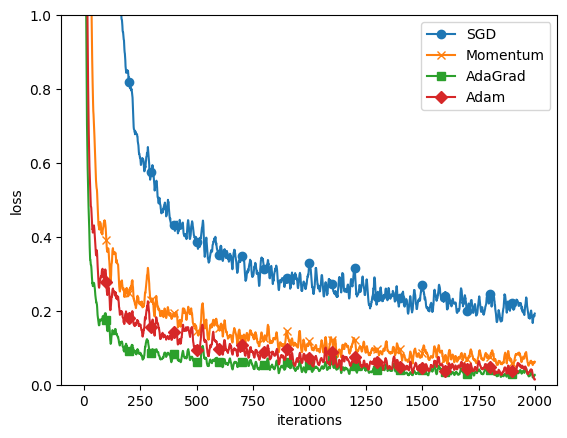

In [19]:
import matplotlib.pyplot as plt
from libs.utils import smooth_curve

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# 가중치의 초깃값

## 가중치 감소
가중치 매개변수의 값이 작아지도록 학습 (일반적으로 `np.random.randn(10, 100)`을 0.01배 한 값 사용)  
가중치를 균일한 값으로 설정하면 오차역번파법에서 똑같은 갱신으로 인해 정상적으로 학습이 이루어지지 않음  
갱신을 거쳐도 여전히 같은 값 유지

## 은닉층의 활성화값 분포
가중치 초깃값에 따른 은닉층 활성화값들의 변화

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from libs.layers import sigmoid


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100) # 1000 data
node_num = 100 # number of node
hidden_layer_size = 5 # number of hidden layer
activations = {} # save activation result

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

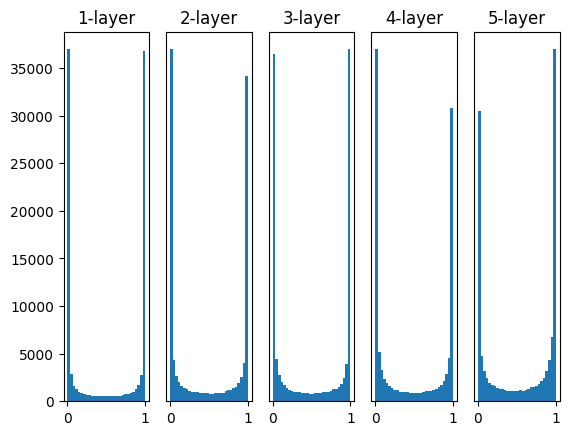

In [21]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

기울기 소실: 0과 1에 치우져 분포 -> 역전파의 기울기 값이 작아지다가 사라짐

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from libs.layers import sigmoid


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100) # 1000 data
node_num = 100 # number of node
hidden_layer_size = 5 # number of hidden layer
activations = {} # save activation result

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 0.01
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

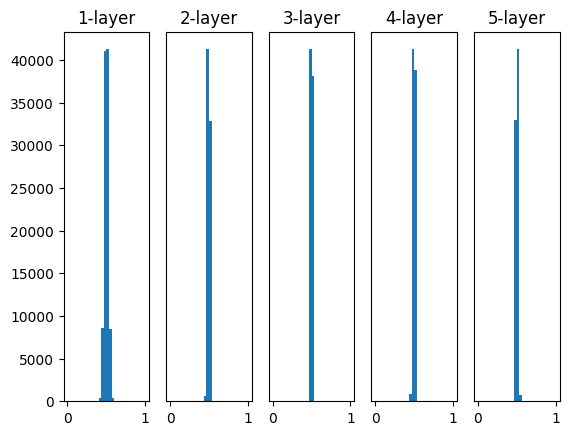

In [23]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

다수의 뉴런이 거의 같은 값을 출력함 -> 표현력을 제한함

적당히 각 층의 활성화값을 분포하는 것이 효율적인 신경망 학습에 중요!

Xavier 초깃값: 딥러닝 프레임워크에서 표준적으로 이용  
앞 계층의 노드가 n개이면 표준편차가 $\frac{1}{\sqrt{n}}$인 분포 사용

앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치 좁게 퍼짐

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from libs.layers import sigmoid


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100) # 1000 data
node_num = 100 # number of node
hidden_layer_size = 5 # number of hidden layer
activations = {} # save activation result

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
    a = np.dot(x, w)
    z = sigmoid(a)

    activations[i] = z

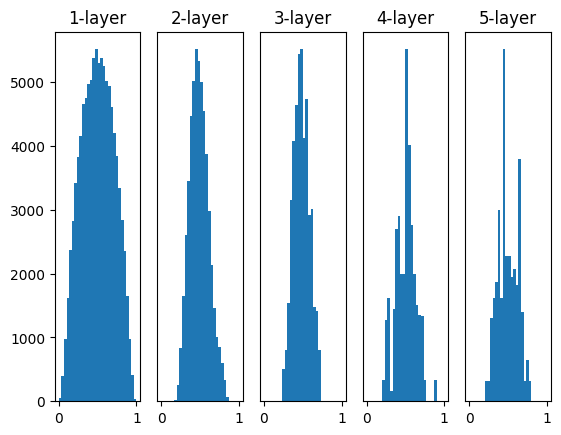

In [25]:
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

각 층에 흐르는 데이터는 적당히 퍼져 있으므로 시그모이드 함수의 표현력도 제한받지 않음

## ReLU 사용시 가중치 초깃값
XaVier 초깃값 -> 활성화 함수가 선형인 경우를 전제 (sigmoid 함수와 tanh 함수)  
ReLU 초깃값 -> He 초깃값: 앞 계층 노드가 n개일 때, 표준편차가 $\sqrt{\frac{2}{n}}$인 정규분포를 사용

# 배치 정규화

In [26]:
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

In [27]:
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [28]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.3025191205540967
Xavier:2.302598079104912
He:2.3822494111110517
===========iteration:100===========
std=0.01:2.3023869370044308
Xavier:2.259978452774511
He:1.357897286100381
===========iteration:200===========
std=0.01:2.303666075938377
Xavier:2.220302991755509
He:0.8482925704956463
===========iteration:300===========
std=0.01:2.301256593949951
Xavier:2.001769438674475
He:0.5615713434033139
===========iteration:400===========
std=0.01:2.300831623560776
Xavier:1.5386638414563778
He:0.4761045074260254
===========iteration:500===========
std=0.01:2.3018304206218057
Xavier:0.9845428193417144
He:0.4333372447645706
===========iteration:600===========
std=0.01:2.298541141708352
Xavier:0.583396678857161
He:0.26207195605415884
===========iteration:700===========
std=0.01:2.302496749518049
Xavier:0.6053597487422586
He:0.466169074802701
===========iteration:800===========
std=0.01:2.3026097583946608
Xavier:0.5339763712355119
He:0.3885448951338758
=====

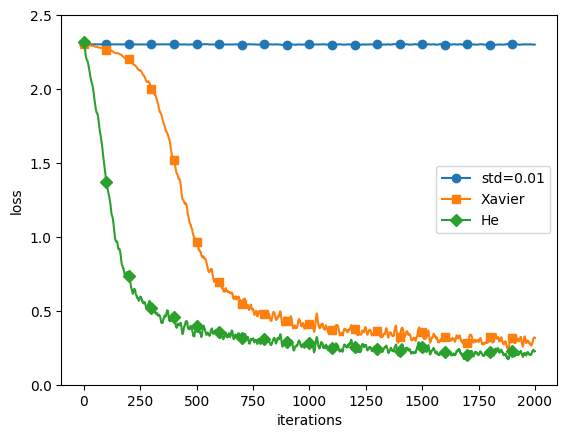

In [29]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

SGD에서 학습이 잘 이루어지지 않은 이유?  
순전파 때 0으로 밀집한 데이터들이 흐르기 때문 -> 역전파 때의 기울기도 작아져 가중치 갱신이 거의 없음

# 배치 정규화

각 층이 활성화를 적당히 퍼뜨리도록 강제하는 것

### 장점
- 빠른 학습 진행
- 초깃값에 크게 의존하지 않음
- 오버피팅 억제

## 배치 정규화 알고리즘

미니배치를 단위로 정규화 (평균 0, 분산 1)  
미니배치 데이터 집합의 평균과 분산을 구한 후, 표준정규화 -> 데이터 분포가 덜 치우치게 할 수 있음  
정규화된 데이터에 고유한 확대와 이동 변환을 수행 (학습하면서 확대와 이동 정도는 적합한 값으로 조정)

## 배치 정규화 효과

In [31]:
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

In [32]:
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [38]:
from libs.layers import MultiLayerNetExtend


def _train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

============== 1/16 ==============


/Users/jinjae/Documents/Code/Jinjae/Deep-Learning-from-Scratch/libs/functions.py:37: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)


============== 2/16 ==============
============== 3/16 ==============
============== 4/16 ==============
============== 5/16 ==============
============== 6/16 ==============
============== 7/16 ==============
============== 8/16 ==============
============== 9/16 ==============
============== 10/16 ==============
============== 11/16 ==============
============== 12/16 ==============
============== 13/16 ==============
============== 14/16 ==============
============== 15/16 ==============
============== 16/16 ==============


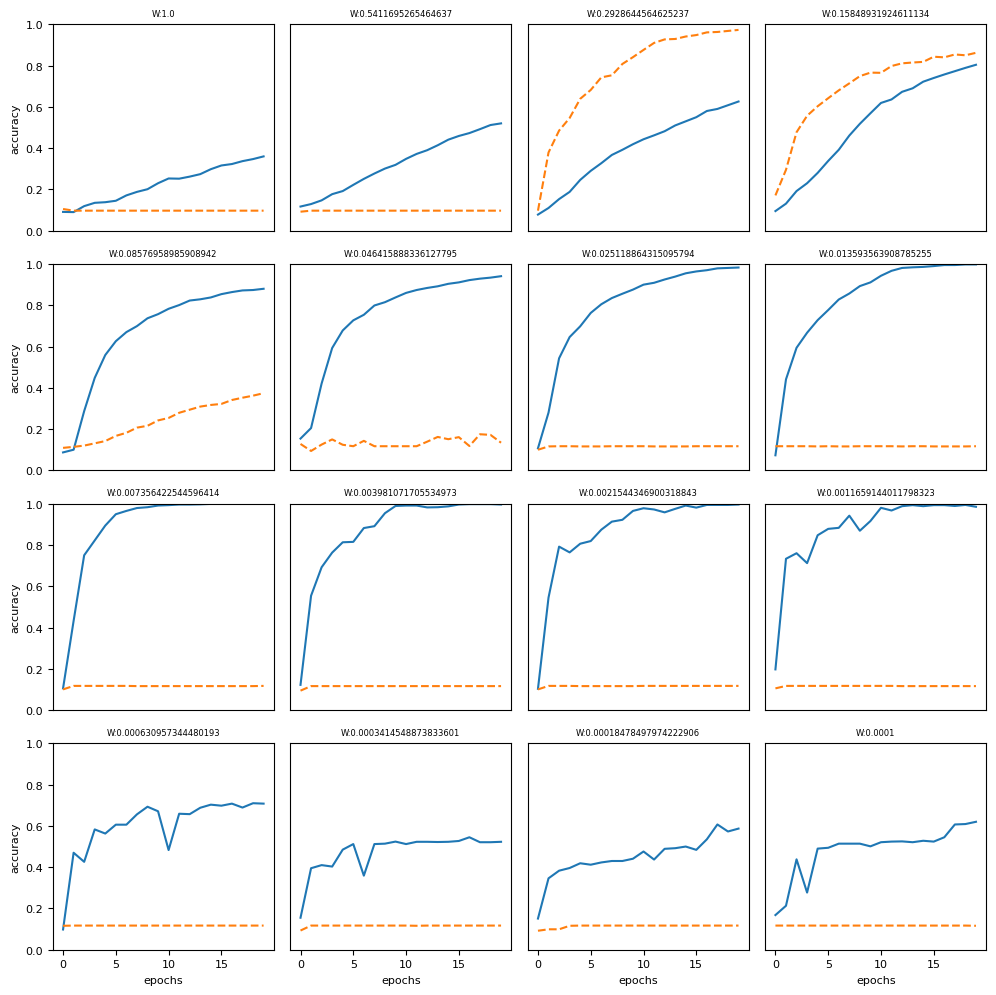

In [44]:
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(10, 10))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = _train(w)

    plt.rcParams.update({'font.size': 8})
    
    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w), fontsize=6)
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")

plt.tight_layout()
plt.show()

# 바른 학습

## 오버피팅
신경망이 훈련 데이터에 지나치게 적응하여 그 외 데이터는 대응하지 못하는 상태

## 오버피팅 발생 경우
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적은 모델

(300개 데이터만 사용, 7층 네트워크 사용 -> 복잡성 높임)

In [56]:
x_train = x_train[:300]
t_train = t_train[:300]

In [57]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [58]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        # print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

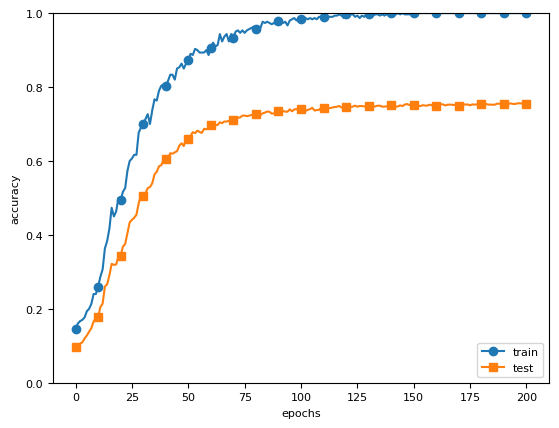

In [59]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에만 과적합되어 테스트 데이터셋의 정확도와 큰 차이가 발생

## 가중치 감소
학습 과정에서 큰 가중치에 대해서는 큰 패널티를 부과하여 오버피팅 억제  
L2 norm을 손실 함수에 더함 -> 가중치가 커지는 것을 억제

L2 norm: 각 원소의 제곱들을 더한 것 (일반적으로 가장 자주 사용함)

In [60]:
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                    weight_decay_lambda=0.1)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

In [61]:
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        # print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

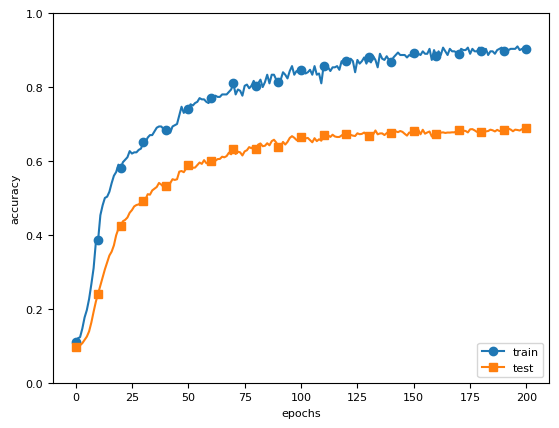

In [62]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

오버피팅이 억제된 것을 확인할 수 있음

## 드롭아웃
뉴런을 임의로 삭제하면서 학습하는 방법  
은닉층의 뉴런을 무작위로 골라서 삭제 -> 신호를 전달하지 않게 됨

In [2]:
%cd ../

/Users/jinjae/Documents/Code/Jinjae/Deep-Learning-from-Scratch


In [3]:
from datasets.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

In [4]:
use_dropout = True
dropout_ratio = 0.2

In [6]:
from libs.trainer import Trainer
from libs.layers import MultiLayerNetExtend

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.327054338088822
=== epoch:1, train acc:0.07, test acc:0.0935 ===
train loss:2.3117414338321725
train loss:2.3077415372424745
train loss:2.3007981732994085
=== epoch:2, train acc:0.07333333333333333, test acc:0.0936 ===
train loss:2.327807462434537
train loss:2.310420381111153
train loss:2.3144585252624346
=== epoch:3, train acc:0.08, test acc:0.0938 ===
train loss:2.3198444196286987
train loss:2.318205385279134
train loss:2.3253677379528357
=== epoch:4, train acc:0.07666666666666666, test acc:0.0941 ===
train loss:2.3147371571320368
train loss:2.3028766653690202
train loss:2.2869301896081784
=== epoch:5, train acc:0.07666666666666666, test acc:0.0945 ===
train loss:2.305166158243326
train loss:2.3042719334695723
train loss:2.309631951701828
=== epoch:6, train acc:0.07333333333333333, test acc:0.0966 ===
train loss:2.3063130437706882
train loss:2.2969679864540966
train loss:2.3128548336043737
=== epoch:7, train acc:0.07333333333333333, test acc:0.0992 ===
train loss:2.29589

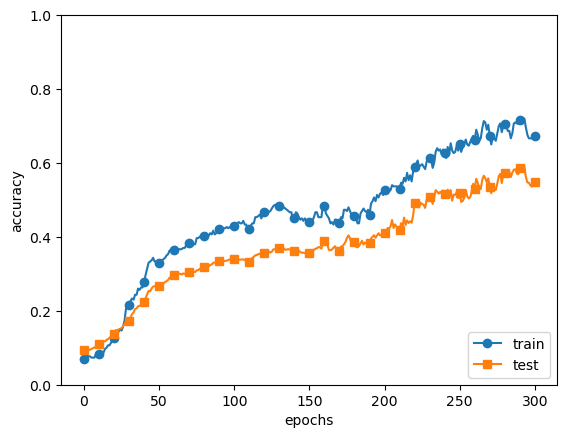

In [8]:
import numpy as np
import matplotlib.pyplot as plt

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Dropout 사용하지 않은 경우

In [9]:
use_dropout = False
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

train loss:2.3660287332863343
=== epoch:1, train acc:0.10666666666666667, test acc:0.0803 ===
train loss:2.338327655910409
train loss:2.3399913072133534
train loss:2.354011109923772
=== epoch:2, train acc:0.12, test acc:0.0896 ===
train loss:2.3445603025525337
train loss:2.2965199702093404
train loss:2.284390094118977
=== epoch:3, train acc:0.13, test acc:0.0953 ===
train loss:2.2719285621206824
train loss:2.270574885339105
train loss:2.252310777767515
=== epoch:4, train acc:0.13333333333333333, test acc:0.0971 ===
train loss:2.2558958136690923
train loss:2.2002296508323878
train loss:2.2255651483933496
=== epoch:5, train acc:0.17333333333333334, test acc:0.1052 ===
train loss:2.253696171284492
train loss:2.158217155488337
train loss:2.1478777558034774
=== epoch:6, train acc:0.18333333333333332, test acc:0.1243 ===
train loss:2.2050304871714785
train loss:2.1666066787516023
train loss:2.177462811220514
=== epoch:7, train acc:0.22333333333333333, test acc:0.1394 ===
train loss:2.1759982

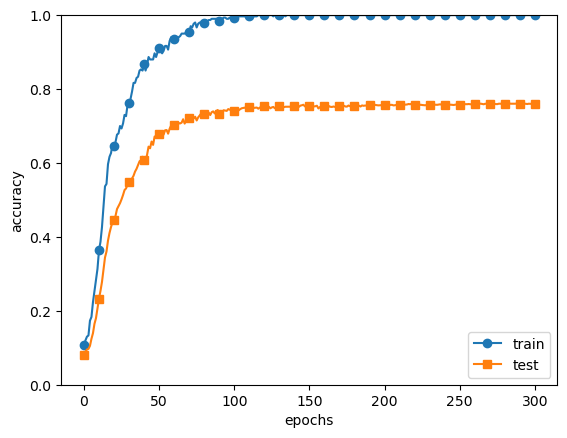

In [10]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃을 이용하면 표현력을 높이면서도 오버피팅 억제 가능

앙상블 학습: 개별적으로 학습시킨 여러 모델의 출력을 편균 내어 추론  
드롭아웃은 뉴런 무작위 삭제 (다른 모델들 학습), 삭제한 비율 곱 (평균 산출)으로 하나의 네트워크에서 앙상블을 구현한 것처럼 생각 가능

# 하이퍼파라미터 찾기

## 검증 데이터
하이퍼파라미터 설정 시 시험 데이터를 사용해서는 안됨 (시험 데이터에 오버피팅)  
검증 데이터 필요 (하이퍼파라미터 조정을 위한 전용 확인 데이터)

In [12]:
from libs.utils import shuffle_dataset

# 훈련 데이터, 검증 데이터, 시험 데이터로 분리
(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

## 검증 데이터 이용 하이퍼파라미터 최적화
최적 값이 존재하는 범위를 줄여나감  
무작위 범위에서 샘플링 후 정확도 평가 -> 반복 (최종 정확도에는 규칙적인 탐색보다 무작위가 더 좋은 결과를 내는 편으로 알려져 있음)

10의 거듭제곱으로 정함 (대략 0.001 ~ 1000 사이의 로그 스케일로 지정)

일반적인 프로세스
 - 하이퍼파라미터 값 범위 설정
 - 설정된 범위에서 하이퍼파라미터 값 무작위 추출
 - 1단계에서 샘플링한 하이퍼파라미터 값 사용 학습, 검증 데이터 이용 정확도 평가
 - 앞 두 과정 반복 -> 최종 결정

베이즈 최적화: 수학 이론 기반으로 더 엄밀하고 효율적인 하이퍼파라미터 최적화 가능

## 하이퍼파라미터 최적화 구현
MNIST 데이터 기반 최적화  
10 단위 로그 스케일: `10 ** np.random.uniform(-3, 3)`

In [1]:
%cd ../

/Users/jinjae/Documents/Code/Jinjae/Deep-Learning-from-Scratch


In [5]:
import numpy as np

from datasets.mnist import load_mnist
from libs.layers import MultiLayerNet
from libs.trainer import Trainer
from libs.utils import shuffle_dataset

In [6]:
# 하이퍼파라미터 무작위 추출
weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)

In [7]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [8]:
def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list

In [9]:
optimization_trial = 100
results_val = {}
results_train = {}

for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

val acc:0.8 | lr:0.006166032835310015, weight decay:1.311243697730365e-08
val acc:0.4 | lr:0.0026195435333648052, weight decay:1.368428285020605e-06
val acc:0.19 | lr:0.0015928330166320836, weight decay:5.508657887806863e-07
val acc:0.13 | lr:0.00014115283447106375, weight decay:1.0782865135547e-08
val acc:0.29 | lr:0.0017447672774517345, weight decay:7.368877759646116e-06
val acc:0.14 | lr:0.00041956310275786674, weight decay:1.1182041238558963e-06
val acc:0.07 | lr:0.00012365281092888673, weight decay:8.460400955174037e-05
val acc:0.83 | lr:0.009835312479760192, weight decay:2.316826016110299e-05
val acc:0.07 | lr:2.947624965033528e-06, weight decay:5.826099302464694e-06
val acc:0.14 | lr:1.1331668986886719e-06, weight decay:5.559472458738094e-06
val acc:0.09 | lr:1.1127468113210842e-06, weight decay:2.1410484554040145e-07
val acc:0.02 | lr:1.7374495995439602e-05, weight decay:2.600270056124196e-08
val acc:0.28 | lr:0.0017192395597669587, weight decay:4.645512222315627e-08
val acc:0.

Result

Best-1(val acc:0.83) | lr:0.009835312479760192, weight decay:2.316826016110299e-05
Best-2(val acc:0.83) | lr:0.009312107061279273, weight decay:2.9560252821278513e-06
Best-3(val acc:0.81) | lr:0.00857278705756324, weight decay:2.8097369598706077e-05
Best-4(val acc:0.8) | lr:0.006166032835310015, weight decay:1.311243697730365e-08
Best-5(val acc:0.77) | lr:0.008531613179877186, weight decay:1.3647970239649192e-05
Best-6(val acc:0.74) | lr:0.005872011727495401, weight decay:1.4464235213880225e-08
Best-7(val acc:0.7) | lr:0.005153715796044039, weight decay:3.9240109527741466e-06
Best-8(val acc:0.68) | lr:0.006032393670456982, weight decay:2.6907591165753624e-06
Best-9(val acc:0.65) | lr:0.004768149433606602, weight decay:7.398228604118298e-06
Best-10(val acc:0.63) | lr:0.003029907501609859, weight decay:4.223991656243021e-07
Best-11(val acc:0.59) | lr:0.00388073543595523, weight decay:1.340393355649776e-06
Best-12(val acc:0.54) | lr:0.0031041983438507537, weight decay:3.7308294248925505e-

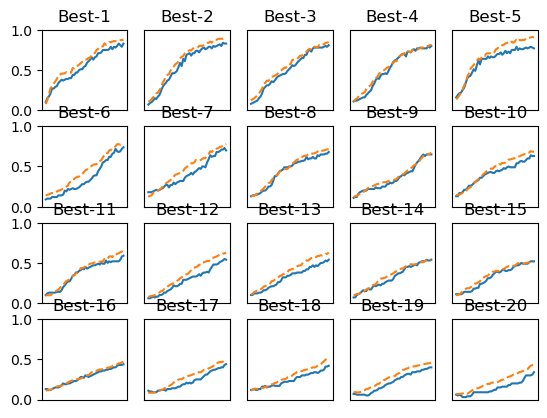

In [11]:
import matplotlib.pyplot as plt

graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()